In [58]:
import pandas as pd

# Assuming the dataset is in a space-separated or tab-separated text file (adjust as needed)
file_path = r"C:\Users\vanes\Downloads\magic+gamma+telescope\magic04.data"

df = pd.read_csv(file_path, sep=',')
# Assigning column headers
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", 
        "fM3Trans", "fAlpha", "fDist", "class"]

df.columns = cols

# Check the first few rows to verify column names and data
print(df.head())

# Save the DataFrame to a CSV file
df.to_csv('magic_gamma_telescope_data.csv', index=False)
df.head()

    fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
1  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
2   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
3   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   
4   51.6240   21.1502  2.9085  0.2420  0.1340   50.8761  43.1887    9.8145   

    fAlpha    fDist class  
0   6.3609  205.261     g  
1  76.9600  256.788     g  
2  10.4490  116.737     g  
3   4.6480  356.462     g  
4   3.6130  238.098     g  


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098,g


In [40]:
# Print the unique values in the class column before any conversion
print(df["class"].unique())


['g' 'h']


In [41]:
# Map 'g' to 1 and 'h' to 0
df["class"] = df["class"].map({'g': 1, 'h': 0})

# Check the unique values to ensure the mapping worked
print(df["class"].unique())

# Check the distribution of the classes
print(df["class"].value_counts())


[1 0]
1    12331
0     6688
Name: class, dtype: int64


In [14]:
!pip install imbalanced-learn


     -------------------------------------- 258.3/258.3 kB 1.1 MB/s eta 0:00:00
     -------------------------------------- 301.8/301.8 kB 1.2 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [19]:
##Train, Test , Validate

In [43]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [44]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [45]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

# kNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [47]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [48]:
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1382
           1       0.84      0.86      0.85      2422

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.80      0.81      0.80      3804



C:\Users\vanes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# SVM

In [49]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1382
           1       0.88      0.90      0.89      2422

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# NN Model

In [50]:
import tensorflow as tf


In [51]:
#from tensorFlow site 

def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [54]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

In [55]:
num_nodes = 64
dropout_prob = 0.2
lr = 0.001
batch_size = 32 
epochs = 20


In [56]:
# Train the model
nn_model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)

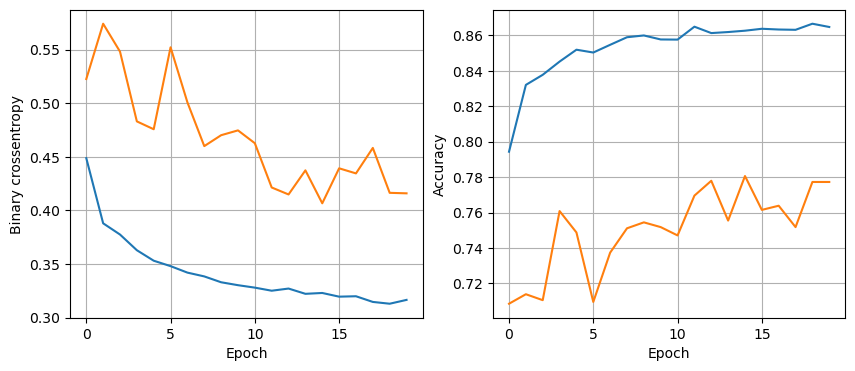

In [57]:
plot_history(history)
